In [1]:
import pandas as pd

In [2]:
import os, warnings
import re
warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
elif platform.system()=="Linux":
    rc('font', family='NanumBarunGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
train=pd.read_csv('./train_df_errno.csv')
test=pd.read_csv('./test_df.csv')
sub=pd.read_csv('./sample_submission.csv')
age=pd.read_csv('./age_gender_info.csv')
train.shape, test.shape, sub.shape, age.shape

((2896, 15), (1008, 14), (150, 2), (16, 23))

In [29]:
test['단지코드'].unique()

array(['C1072', 'C1128', 'C1456', 'C1840', 'C1332', 'C1563', 'C1794',
       'C1640', 'C1377', 'C2072', 'C1472', 'C1006', 'C1083', 'C1311',
       'C2676', 'C2318', 'C1603', 'C2523', 'C2177', 'C2411', 'C2033',
       'C1604', 'C2535', 'C1040', 'C2417', 'C1812', 'C2253', 'C1294',
       'C1772', 'C2646', 'C1152', 'C2423', 'C1844', 'C1318', 'C1729',
       'C1602', 'C1239', 'C1721', 'C1902', 'C1855', 'C2600', 'C1071',
       'C2295', 'C1621', 'C1852', 'C2555', 'C1297', 'C2323', 'C2215',
       'C2112', 'C1830', 'C2602', 'C2608', 'C1215', 'C2369', 'C1158',
       'C1887', 'C1189', 'C1637', 'C1225', 'C2374', 'C2397', 'C1105',
       'C1782', 'C1629', 'C1708', 'C2144', 'C1617', 'C1149', 'C1323',
       'C1064', 'C1019', 'C2269', 'C1416', 'C1250', 'C1741', 'C1016',
       'C2436', 'C2039', 'C1253', 'C2028', 'C1166', 'C1135', 'C1216',
       'C1593', 'C1826', 'C1827', 'C1564', 'C1495', 'C2653', 'C1392',
       'C2128', 'C1282', 'C1521', 'C2076', 'C1060', 'C2473', 'C2557',
       'C1835', 'C22

In [20]:
train['단지코드'].unique()

array(['C2515', 'C1407', 'C1945', 'C1470', 'C1898', 'C1244', 'C1171',
       'C2073', 'C2513', 'C1936', 'C2049', 'C2202', 'C1925', 'C2576',
       'C1312', 'C1874', 'C2650', 'C2416', 'C2013', 'C1424', 'C2100',
       'C2621', 'C2520', 'C2319', 'C1616', 'C1704', 'C2258', 'C1032',
       'C2038', 'C1859', 'C1722', 'C1850', 'C2190', 'C1476', 'C1077',
       'C1068', 'C1983', 'C2135', 'C2034', 'C1109', 'C1497', 'C2289',
       'C2597', 'C2310', 'C1672', 'C2132', 'C1439', 'C1613', 'C2216',
       'C1899', 'C1056', 'C2644', 'C1206', 'C2481', 'C1718', 'C1655',
       'C1430', 'C1775', 'C1519', 'C2221', 'C1790', 'C2109', 'C1698',
       'C1866', 'C1005', 'C1004', 'C1875', 'C2156', 'C2212', 'C2401',
       'C2571', 'C1175', 'C1833', 'C2445', 'C1885', 'C2368', 'C2016',
       'C2371', 'C2536', 'C2538', 'C1014', 'C1592', 'C1867', 'C2326',
       'C1015', 'C1620', 'C1049', 'C2000', 'C2097', 'C1668', 'C1689',
       'C1234', 'C2514', 'C1368', 'C1057', 'C2336', 'C1026', 'C2256',
       'C1900', 'C26

In [28]:
train.loc[train['단지코드']=='C1171']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
47,C1171,624,아파트,대전광역시,국민임대,33.38,190,13.0,A,17730000,118190,0.0,5.0,634.0,700.0
48,C1171,624,아파트,대전광역시,국민임대,39.46,106,13.0,A,23641000,141840,0.0,5.0,634.0,700.0
49,C1171,624,아파트,대전광역시,국민임대,39.46,43,13.0,A,23641000,141840,0.0,5.0,634.0,700.0
50,C1171,624,아파트,대전광역시,국민임대,39.46,15,13.0,A,23641000,141840,0.0,5.0,634.0,700.0
51,C1171,624,아파트,대전광역시,국민임대,46.66,38,13.0,A,35462000,189130,0.0,5.0,634.0,700.0
52,C1171,624,아파트,대전광역시,국민임대,46.66,15,13.0,A,35462000,189130,0.0,5.0,634.0,700.0
53,C1171,624,아파트,대전광역시,국민임대,46.87,46,13.0,A,35462000,189130,0.0,5.0,634.0,700.0
54,C1171,624,아파트,대전광역시,국민임대,46.87,23,13.0,A,35462000,189130,0.0,5.0,634.0,700.0
55,C1171,624,아파트,대전광역시,국민임대,46.88,78,13.0,A,35462000,189130,0.0,5.0,634.0,700.0
56,C1171,624,아파트,대전광역시,국민임대,46.88,30,13.0,A,35462000,189130,0.0,5.0,634.0,700.0


In [6]:
#자격유형,강사님꺼
test.loc[196,'자격유형']='A'
test.loc[258,'자격유형']='C'

In [107]:
#10분내 버스정류장수 -> 결측치 확인해보니 데이터가 있었다.
train.loc[train['10분내버스정류장수'].isnull(),"10분내버스정류장수"]=2
train.loc[train['10분내버스정류장수'].isnull(),:]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수


In [108]:
#10분내지하철수 결측치부터확인
null_sub=train.loc[train['10분내지하철수'].isnull()].sort_values(by=['지역'])
print("train의 10분내지하철 결측치지역:",null_sub['지역'].unique())
null_sub_test=test.loc[test['10분내지하철수'].isnull()].sort_values(by=['지역'])
print("test의 10분내지하철 결측치지역:",null_sub_test['지역'].unique())

train의 10분내지하철 결측치지역: ['경상남도' '대전광역시' '충청남도']
test의 10분내지하철 결측치지역: ['대전광역시' '충청남도']


In [109]:
#대전은 최빈값
daejeon=train.loc[train['지역']=='대전광역시'].sort_values(by=['10분내지하철수'])
print("train의 지하철 대전 빈도값:",daejeon['10분내지하철수'].value_counts())
daejeon_test=test.loc[test['지역']=='대전광역시'].sort_values(by=['10분내지하철수'])
print("test의 지하철 대전 빈도값:",daejeon_test['10분내지하철수'].value_counts())

train의 지하철 대전 빈도값: 1.0    125
0.0     48
Name: 10분내지하철수, dtype: int64
test의 지하철 대전 빈도값: 2.0    27
0.0    14
1.0     6
Name: 10분내지하철수, dtype: int64


In [110]:
#대전꺼만 빈도수로 넣기
train.loc[(train["10분내지하철수"].isna()) & (train["지역"] == "대전광역시"), "10분내지하철수"] = 1
test.loc[(test["10분내지하철수"].isna()) & (test["지역"] == "대전광역시"), "10분내지하철수"] = 1

In [111]:
#나머지 지역은 0으로
train['10분내지하철수']=train['10분내지하철수'].fillna(0)
test['10분내지하철수']=test['10분내지하철수'].fillna(0)

In [112]:
print(train['10분내지하철수'].isnull().sum())
print(test['10분내지하철수'].isnull().sum())

0
0


In [113]:
#임대보증금과 임대료에 있는 '-'없애기,train
grouped=train.groupby(['임대보증금'])
group1=grouped.get_group(('-'))
a=group1.index
for x in a:
    train.loc[x,'임대보증금'] = 0
grouped1=train.groupby(['임대료'])
group2=grouped1.get_group(('-'))
a=group2.index
for x in a:
    train.loc[x,'임대료']=0

In [114]:
#임대보증금과 임대료에 있는 '-'없애기,train
grouped=test.groupby(['임대보증금'])
group1=grouped.get_group(('-'))
a=group1.index
for x in a:
    test.loc[x,'임대보증금'] = 0
grouped1=test.groupby(['임대료'])
group2=grouped1.get_group(('-'))
a=group2.index
for x in a:
    test.loc[x,'임대료']=0

In [115]:
#공공분양은 임대보증금과 임대료가 없다
train.loc[(train["임대보증금"].isna()) & (train['공급유형']== '공공분양'), "임대보증금"] =0
train.loc[(train["임대료"].isna()) & (train['공급유형']== '공공분양'), "임대료"] = 0
test.loc[(train["임대보증금"].isna()) & (test['공급유형']=='공공분양'), "임대보증금"] = 0
train.loc[(train["임대료"].isna()) & (train['공급유형']== '공공분양'), "임대료"] = 0

In [116]:
train.loc[(train['공급유형']=='공공분양').isna()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수


In [117]:
#장기전세는 임대료가 없다
train.loc[(train["임대료"].isna()) & (train['공급유형']== '장기전세'), "임대료"] = 0
test.loc[(train["임대료"].isna()) & (test['공급유형']=='장기전세'), "임대료"] = 0

In [118]:
train.loc[(train['공급유형']=='장기전세').isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수


In [119]:
#임대상가의 임대보증금 결측치를 지역별로 보자,train
train.loc[(train["임대보증금"].isna()) & (train["임대건물구분"] == "상가")].sort_values(by=['지역'])
a=train.loc[(train["임대보증금"].isna()) & (train["임대건물구분"] == "상가")].sort_values(by=['지역'])
a['지역'].value_counts()

부산광역시      220
대전광역시      113
경상남도        97
충청남도        76
강원도         31
제주특별자치도     25
Name: 지역, dtype: int64

In [120]:
#임대상가의 임대료 결측치를 지역별로 보자,train
train.loc[(train["임대료"].isna()) & (train["임대건물구분"] == "상가")].sort_values(by=['지역'])
b=train.loc[(train["임대보증금"].isna()) & (train["임대건물구분"] == "상가")].sort_values(by=['지역'])
b['지역'].value_counts()

부산광역시      220
대전광역시      113
경상남도        97
충청남도        76
강원도         31
제주특별자치도     25
Name: 지역, dtype: int64

In [121]:
#임대상가의 임대보증금 결측치를 지역별로 보자,test
test.loc[(test["임대보증금"].isna()) & (test["임대건물구분"] == "상가")].sort_values(by=['지역'])
a=test.loc[(test["임대보증금"].isna()) & (test["임대건물구분"] == "상가")].sort_values(by=['지역'])
a['지역'].value_counts()

울산광역시    47
강원도      45
부산광역시    43
충청남도     22
대전광역시    20
Name: 지역, dtype: int64

In [122]:
#임대상가의 임대료 결측치를 지역별로 보자,test
test.loc[(test["임대료"].isna()) & (test["임대건물구분"] == "상가")].sort_values(by=['지역'])
b=test.loc[(test["임대보증금"].isna()) & (test["임대건물구분"] == "상가")].sort_values(by=['지역'])
b['지역'].value_counts()

울산광역시    47
강원도      45
부산광역시    43
충청남도     22
대전광역시    20
Name: 지역, dtype: int64

In [123]:
# 부산광역시
train.loc[(train["임대료"].isnull()) & (train["지역"] == "부산광역시"), "임대료"] = train.loc[(train["임대료"].isnull()) & (train["지역"] == "부산광역시"), "전용면적"]* 4609
test.loc[(test["임대료"].isnull()) & (test["지역"] == "부산광역시"), "임대료"] = test.loc[(test["임대료"].isnull()) & (test["지역"] == "부산광역시"), "전용면적"]* 4609
train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "부산광역시"), "임대보증금"] = train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "부산광역시"), "전용면적"]* 110636
test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "부산광역시"), "임대보증금"] = test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "부산광역시"), "전용면적"]* 110636

In [124]:
# 대전광역시
train.loc[(train["임대료"].isnull()) & (train["지역"] == "대전광역시"), "임대료"] = train.loc[(train["임대료"].isnull()) & (train["지역"] == "대전광역시"), "전용면적"]* 4148
test.loc[(test["임대료"].isnull()) & (test["지역"] == "대전광역시"), "임대료"] = test.loc[(test["임대료"].isnull()) & (test["지역"] == "대전광역시"), "전용면적"]* 4148
train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "대전광역시"), "임대보증금"] = train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "대전광역시"), "전용면적"]* 149655
test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "대전광역시"), "임대보증금"] = test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "대전광역시"), "전용면적"]* 149655

In [125]:
#경상남도(train만)
train.loc[(train["임대료"].isnull()) & (train["지역"] == "경상남도"), "임대료"] = train.loc[(train["임대료"].isnull()) & (train["지역"] == "경상남도"), "전용면적"]* 3398
train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "경상남도"), "임대보증금"] = train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "경상남도"), "전용면적"]* 123789

In [126]:
#충청남도
train.loc[(train["임대료"].isnull()) & (train["지역"] == "충청남도"), "임대료"] = train.loc[(train["임대료"].isnull()) & (train["지역"] == "충청남도"), "전용면적"]* 3795
test.loc[(test["임대료"].isnull()) & (test["지역"] == "충청남도"), "임대료"] = test.loc[(test["임대료"].isnull()) & (test["지역"] == "충청남도"), "전용면적"]* 3795
train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "충청남도"), "임대보증금"] = train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "충청남도"), "전용면적"]* 136564
test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "충청남도"), "임대보증금"] = test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "충청남도"), "전용면적"]* 136564

In [127]:
#강원도
train.loc[(train["임대료"].isnull()) & (train["지역"] == "강원도"), "임대료"] = train.loc[(train["임대료"].isnull()) & (train["지역"] == "강원도"), "전용면적"]* 3902
test.loc[(test["임대료"].isnull()) & (test["지역"] == "강원도"), "임대료"] = test.loc[(test["임대료"].isnull()) & (test["지역"] == "강원도"), "전용면적"]* 3902
train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "강원도"), "임대보증금"] = train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "강원도"), "전용면적"]* 154664
test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "강원도"), "임대보증금"] = test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "강원도"), "전용면적"]* 154664

In [128]:
#제주특별자치도(train만)
train.loc[(train["임대료"].isnull()) & (train["지역"] == "제주특별자치도"), "임대료"] = train.loc[(train["임대료"].isnull()) & (train["지역"] == "제주특별자치도"), "전용면적"]* 5722
train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "제주특별자치도"), "임대보증금"] = train.loc[(train["임대보증금"].isnull()) & (train["지역"] == "제주특별자치도"), "전용면적"]* 230685

In [129]:
#울산광역시(test만)
test.loc[(test["임대료"].isnull()) & (test["지역"] == "울산광역시"), "임대료"] = test.loc[(test["임대료"].isnull()) & (test["지역"] == "울산광역시"), "전용면적"]* 5354
test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "울산광역시"), "임대보증금"] = test.loc[(test["임대보증금"].isnull()) & (test["지역"] == "울산광역시"), "전용면적"]* 128508

In [130]:
train["임대료"] = train["임대료"].astype(int)
test["임대료"] = test["임대료"].astype(int)
train["임대보증금"] = train["임대보증금"].astype(int)
test["임대보증금"] = test["임대보증금"].astype(int)

In [131]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]
for one1 in group1:
    train.loc[ train['단지코드'] == one1, "단지코드_Type" ] = 1
    test.loc[ test['단지코드'] == one1, "단지코드_Type" ] = 1

In [132]:
group2=['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804' ]
for one1 in group2:
    train.loc[train['단지코드'] == one1, '단지코드_Type']=2
    test.loc[test['단지코드'] == one1, '단지코드_Type']=2

In [133]:
train.loc[train['단지코드_Type'].isna(), "단지코드_Type"] = 0
test.loc[test['단지코드_Type'].isna(), "단지코드_Type"] = 0
print(train['단지코드_Type'].unique())
print(test['단지코드_Type'].unique())

[0. 1. 2.]
[0. 1. 2.]


In [134]:
train['전용면적'] = train['전용면적']//5*5
test['전용면적'] = test['전용면적']//5*5

In [135]:
idx = train[train['전용면적']>100].index
train.loc[idx, '전용면적'] = 100
idx = test[test['전용면적']>100].index
test.loc[idx, '전용면적'] = 100

idx = train[train['전용면적']<15].index
train.loc[idx, '전용면적'] = 15
idx = test[test['전용면적']<15].index
test.loc[idx, '전용면적'] = 15

In [136]:
#주차면수 대비 총세대수가 높을 수록 주차수요가 높을것이다
train['주차면수 대비 총세대수']=train['단지내주차면수']/train['총세대수']
test['주차면수 대비 총세대수']=test['단지내주차면수']/test['총세대수']

In [137]:
#거주율이 높을 수록 주차수요가 높을 것이다.
train['거주율']=1-(train['공가수']/train['총세대수'])
test['거주율']=1-(test['공가수']/test['총세대수'])

In [138]:
train.loc[(train["자격유형"]=='C') | (train["자격유형"]=='E') | (train["자격유형"]=='F') | (train["자격유형"]=='I') , "소득분위"] =1
train.loc[(train["자격유형"]=='B') | (train["자격유형"]=='G') | (train["자격유형"]=='H'), "소득분위"] =2
train.loc[(train["자격유형"]=='A'), "소득분위"] =3
train.loc[(train["자격유형"]=='J') | (train["자격유형"]=='K') | (train["자격유형"]=='L') |(train["자격유형"]=='M') |(train["자격유형"]=='N')|(train["자격유형"]=='O'), "소득분위"] =4
train.loc[(train["자격유형"]=='D'), "소득분위"] =5

In [139]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수',
       '단지코드_Type', '주차면수 대비 총세대수', '거주율', '소득분위'],
      dtype='object')

<AxesSubplot:>

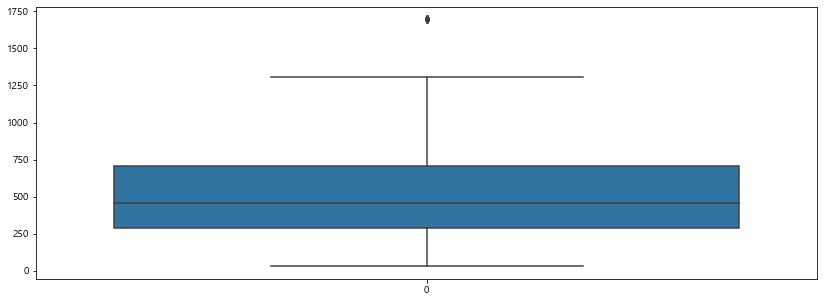

In [153]:
plt.figure(figsize=(14,5))
sns.boxplot(data=test['단지내주차면수'])

In [156]:
test.loc[test['단지내주차면수']>1500]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,주차면수 대비 총세대수,거주율
38,C1563,1974,아파트,경기도,국민임대,35.0,214,15.0,A,30040000,206380,0.0,6.0,1696.0,0.0,0.859169,0.992401
39,C1563,1974,아파트,경기도,국민임대,35.0,34,15.0,A,30040000,206380,0.0,6.0,1696.0,0.0,0.859169,0.992401
40,C1563,1974,아파트,경기도,국민임대,35.0,471,15.0,H,31481000,216280,0.0,6.0,1696.0,0.0,0.859169,0.992401
41,C1563,1974,아파트,경기도,국민임대,45.0,72,15.0,A,44717000,309580,0.0,6.0,1696.0,0.0,0.859169,0.992401
42,C1563,1974,아파트,경기도,국민임대,45.0,68,15.0,A,44717000,309580,0.0,6.0,1696.0,0.0,0.859169,0.992401
43,C1563,1974,아파트,경기도,국민임대,45.0,336,15.0,A,44717000,309580,0.0,6.0,1696.0,0.0,0.859169,0.992401
44,C1563,1974,아파트,경기도,국민임대,45.0,108,15.0,A,44717000,309580,0.0,6.0,1696.0,0.0,0.859169,0.992401
45,C1563,1974,아파트,경기도,국민임대,45.0,72,15.0,A,44717000,309580,0.0,6.0,1696.0,0.0,0.859169,0.992401
46,C1563,1974,아파트,경기도,국민임대,50.0,491,15.0,H,53110000,360480,0.0,6.0,1696.0,0.0,0.859169,0.992401
47,C1563,1974,아파트,경기도,국민임대,50.0,60,15.0,A,50679000,343970,0.0,6.0,1696.0,0.0,0.859169,0.992401


### train, test 합치기

In [39]:
all_df = pd.concat([train, test], join='inner', ignore_index=True)
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,주차면수 대비 총세대수,거주율
0,C2515,545,아파트,경상남도,국민임대,30.0,276,17.0,A,9216000,82940,0.0,3.0,624.0,0.0,1.144954,0.968807
1,C2515,545,아파트,경상남도,국민임대,35.0,60,17.0,A,12672000,107130,0.0,3.0,624.0,0.0,1.144954,0.968807
2,C2515,545,아파트,경상남도,국민임대,35.0,20,17.0,A,12672000,107130,0.0,3.0,624.0,0.0,1.144954,0.968807
3,C2515,545,아파트,경상남도,국민임대,45.0,38,17.0,A,18433000,149760,0.0,3.0,624.0,0.0,1.144954,0.968807
4,C2515,545,아파트,경상남도,국민임대,45.0,19,17.0,A,18433000,149760,0.0,3.0,624.0,0.0,1.144954,0.968807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,C1267,675,아파트,경상남도,행복주택,35.0,126,38.0,L,0,0,0.0,1.0,467.0,1.0,0.691852,0.943704
3900,C2189,382,아파트,전라북도,국민임대,25.0,96,45.0,H,6872000,106400,0.0,2.0,300.0,1.0,0.785340,0.882199
3901,C2189,382,아파트,전라북도,국민임대,25.0,20,45.0,H,6872000,106400,0.0,2.0,300.0,1.0,0.785340,0.882199
3902,C2189,382,아파트,전라북도,국민임대,35.0,202,45.0,H,13410000,144600,0.0,2.0,300.0,1.0,0.785340,0.882199


In [40]:
#다르게 나눠보자 - 4개로 (큰 섹션으로)

all_df.loc[ all_df['10분내버스정류장수'] <= 8, '버스교통편의성'] = 0
all_df.loc[(all_df['10분내버스정류장수'] > 8) & (all_df['10분내버스정류장수'] <= 12), '버스교통편의성'] = 1
all_df.loc[(all_df['10분내버스정류장수'] > 12) & (all_df['10분내버스정류장수'] <= 16), '버스교통편의성'] = 2
all_df.loc[ all_df['10분내버스정류장수'] > 16, '버스교통편의성'] = 3

In [41]:
train_df = all_df.iloc[0:2896,:]
test = all_df.iloc[2896:,:]

train_df.shape, test.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train = train_df

In [42]:
# train.loc[(train["공급유형"]=='임대상가') & (train["임대건물구분"] == "아파트")].sort_values(by=['단지코드'])
train.loc[train['임대건물구분']=='상가'].sort_values(by=['단지코드']).head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,주차면수 대비 총세대수,거주율,버스교통편의성,등록차량수
773,C1004,521,상가,충청남도,임대상가,50.0,1,3.0,D,6839125,190053,0.0,2.0,153.0,0.0,0.293666,0.994242,0.0,93.0
766,C1004,521,상가,충청남도,임대상가,20.0,1,3.0,D,3195597,88803,0.0,2.0,153.0,0.0,0.293666,0.994242,0.0,93.0
765,C1004,521,상가,충청남도,임대상가,20.0,1,3.0,D,3195597,88803,0.0,2.0,153.0,0.0,0.293666,0.994242,0.0,93.0
764,C1004,521,상가,충청남도,임대상가,20.0,1,3.0,D,3195597,88803,0.0,2.0,153.0,0.0,0.293666,0.994242,0.0,93.0
763,C1004,521,상가,충청남도,임대상가,20.0,1,3.0,D,3134143,87095,0.0,2.0,153.0,0.0,0.293666,0.994242,0.0,93.0


In [43]:
#상가만 뽑음 (train, test)
mix_apt=train.loc[train['임대건물구분']=='상가'].sort_values(by=['단지코드'])
mix_apt['단지코드'].unique()
mix_apt_test=test.loc[test['임대건물구분']=='상가'].sort_values(by=['단지코드'])
mix_apt_test['단지코드'].unique()

array(['C1006', 'C1729', 'C1812', 'C2033', 'C2177', 'C2253', 'C2676'],
      dtype=object)

In [44]:

sel=['C1004', 'C1056', 'C1109', 'C1206', 'C1439', 'C1476', 'C1616',
       'C1698', 'C1704', 'C1722', 'C1775', 'C1790', 'C1859', 'C1874',
       'C1875', 'C1899', 'C1925', 'C1983', 'C2034', 'C2038', 'C2109',
       'C2132', 'C2135', 'C2190', 'C2212', 'C2258', 'C2289', 'C2310',
       'C2416', 'C2571', 'C2597', 'C2621', 'C2644']
for one in sel:
    train.loc[ train['단지코드'] == one, "단지분류" ] = 1
print(len(mix_apt['단지코드'].unique()))

sel=['C1006', 'C1729', 'C1812', 'C2033', 'C2177', 'C2253', 'C2676']
for one in sel:
    test.loc[ test['단지코드'] == one, "단지분류" ] = 1
print(len(mix_apt_test['단지코드'].unique()))

33
7


In [45]:
train.loc[(train["단지분류"]==1) & (train["임대건물구분"] == "아파트"),'단지분류']=2
test.loc[(train["단지분류"]==1) & (test["임대건물구분"] == "아파트"),'단지분류']=2
train.loc[train['단지분류'].isna(), "단지분류"] = 3
test.loc[test['단지분류'].isna(), "단지분류"] = 3
print(train['단지분류'].value_counts())
print(test['단지분류'].value_counts())

3.0    2232
1.0     562
2.0     102
Name: 단지분류, dtype: int64
3.0    802
1.0    206
Name: 단지분류, dtype: int64


In [46]:
apt_with_sanga_code = sorted(train.loc[(train["단지분류"] == 2)].단지코드.unique())
apt_with_sanga_code_1 = sorted(test.loc[(test["단지분류"] == 2)].단지코드.unique())

In [47]:
train.loc[train['단지분류'].isna(), "단지분류"] = 3
test.loc[test['단지분류'].isna(), "단지분류"] = 3
print(train['단지분류'].value_counts())
print(test['단지분류'].value_counts())

3.0    2232
1.0     562
2.0     102
Name: 단지분류, dtype: int64
3.0    802
1.0    206
Name: 단지분류, dtype: int64


In [48]:
for code in apt_with_sanga_code:
  train.loc[(train["단지코드"] == code) & train["임대건물구분"] == "상가", "단지분류"] = 2
for code in apt_with_sanga_code_1:
  test.loc[(test["단지코드"] == code) & test["임대건물구분"] == "상가", "단지분류"] = 2

In [49]:
train.loc[train['단지분류'].isna(), "단지분류"] = 3
test.loc[test['단지분류'].isna(), "단지분류"] = 3

In [50]:
#대단지: 1000세대이상, 중단지: 그외, 소단지:400세대이하
train.loc[(train['단지분류']==3) & (train["총세대수"] < 400), "단지분류"] = 3
train.loc[(train['단지분류']==3) & (train["총세대수"] >= 400) & (train["총세대수"] < 1000), "단지분류"] = 4
train.loc[(train['단지분류']==3) & (train["총세대수"] >= 1000), "단지분류"] = 5
test.loc[(test['단지분류']==3) & (test["총세대수"] < 400), "단지분류"] = 3
test.loc[(test['단지분류']==3) & (test["총세대수"] >= 400) & (test["총세대수"] < 1000), "단지분류"] = 4
test.loc[(test['단지분류']==3) & (test["총세대수"] >= 1000), "단지분류"] = 5

In [51]:
print(train['단지분류'].unique())
print(test['단지분류'].unique())

[4. 5. 3. 2. 1.]
[4. 5. 3. 1.]


In [52]:
print("단지분류1(상가)=",len(train.loc[(train['단지분류']==1)]))
print("단지분류2(주상복합)=",len(train.loc[(train['단지분류']==2)]))
print("단지분류3(소단지)=",len(train.loc[(train['단지분류']==3)]))
print("단지분류4(중단지)=",len(train.loc[(train['단지분류']==4)]))
print("단지분류5(대단지)=",len(train.loc[(train['단지분류']==5)]))

단지분류1(상가)= 562
단지분류2(주상복합)= 102
단지분류3(소단지)= 371
단지분류4(중단지)= 1273
단지분류5(대단지)= 588


### mapping

In [53]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5,
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10,
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }
train['자격유형']=train['자격유형'].map(mapping).astype(int)
test['자격유형']=test['자격유형'].map(mapping).astype(int)

In [54]:
mapping = { '국민임대':1, '임대상가':2, '행복주택':3, '공공임대(10년)':4, 
           '영구임대':5,'공공임대(50년)':6,
           '공공임대(분납)':7, '장기전세':8, '공공분양':9, '공공임대(5년)':10 }
train['공급유형'] =train['공급유형'].map(mapping).astype(int)
test['공급유형'] =test['공급유형'].map(mapping).astype(int)

In [55]:
mapping1 = { '경기도':1, '경상남도':2, '부산광역시':3, '대전광역시':4, 
           '강원도':5,'충청북도':6,'충청남도':7, '전라남도':8, '광주광역시':9, 
            '경상북도':10, '전라북도':11,'대구광역시':12,'제주특별자치도':13,'서울특별시':14,'세종특별자치시':15,'울산광역시':16 }
train['지역'] =train['지역'].map(mapping1).astype(int)
test['지역'] =test['지역'].map(mapping1).astype(int)

In [56]:
mapping2 = { '아파트':1, '상가':2}
train['임대건물구분'] =train['임대건물구분'].map(mapping2).astype(int)
test['임대건물구분'] =test['임대건물구분'].map(mapping2).astype(int)

### dtype 변경

### 머신러닝 전처리

In [57]:
#전처리, 교차검증용
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [58]:
import time

In [59]:
#머신러닝모델들
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import numpy as np

In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
# train["임대건물구분"] = train["임대건물구분"].astype(int)
train.corr()["log_등록차량수"].sort_values(key=abs, ascending=False)

log_등록차량수       1.000000
등록차량수           0.881679
단지내주차면수         0.805096
단지분류            0.795622
주차면수 대비 총세대수    0.735821
임대건물구분         -0.596565
임대보증금           0.408504
전용면적            0.352504
전용면적별세대수        0.274772
자격유형           -0.239157
총세대수            0.228964
공가수             0.200793
임대료             0.199280
거주율             0.165478
10분내지하철수       -0.126218
공급유형           -0.093697
10분내버스정류장수      0.078813
버스교통편의성         0.062039
지역              0.039954
단지코드_Type      -0.037334
Name: log_등록차량수, dtype: float64

In [63]:
sel=['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
     '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
     '단지코드_Type', '주차면수 대비 총세대수', '거주율', '버스교통편의성', '단지분류']
X=train[sel]
y=train['log_등록차량수']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=0)

In [64]:
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


### catboost

In [68]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [69]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent',
    task_type='GPU'
)

In [70]:
print(X.dtypes.reset_index())
print(np.where(X.dtypes != np.float)[0])
categorical_features_indices = np.ndarray([0, 2, 3, 4, 8, 14, 17, 18])

           index        0
0           총세대수    int64
1         임대건물구분    int32
2             지역    int32
3           공급유형    int32
4           전용면적  float64
5       전용면적별세대수    int64
6            공가수  float64
7           자격유형    int32
8          임대보증금    int32
9            임대료    int32
10      10분내지하철수  float64
11    10분내버스정류장수  float64
12       단지내주차면수  float64
13     단지코드_Type  float64
14  주차면수 대비 총세대수  float64
15           거주율  float64
16       버스교통편의성  float64
17          단지분류  float64
[0 1 2 3 5 7 8 9]


In [ ]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.113725
0:	learn: 5.6202674	test: 5.6266449	best: 5.6266449 (0)	total: 1.2s	remaining: 19m 57s
1:	learn: 5.3731166	test: 5.3925363	best: 5.3925363 (1)	total: 2.33s	remaining: 19m 22s
2:	learn: 5.1410265	test: 5.1717378	best: 5.1717378 (2)	total: 3.58s	remaining: 19m 48s
3:	learn: 4.9733585	test: 5.0191738	best: 5.0191738 (3)	total: 4.95s	remaining: 20m 32s
4:	learn: 4.8026903	test: 4.8624193	best: 4.8624193 (4)	total: 6.22s	remaining: 20m 38s
5:	learn: 4.6235028	test: 4.6983788	best: 4.6983788 (5)	total: 7.54s	remaining: 20m 48s
6:	learn: 4.4822825	test: 4.5700903	best: 4.5700903 (6)	total: 8.85s	remaining: 20m 55s
7:	learn: 4.3380291	test: 4.4403329	best: 4.4403329 (7)	total: 10.1s	remaining: 20m 53s
8:	learn: 4.2101044	test: 4.3236940	best: 4.3236940 (8)	total: 11.3s	remaining: 20m 47s
9:	learn: 4.0581859	test: 4.1906529	best: 4.1906529 (9)	total: 13s	remaining: 21m 24s
10:	learn: 3.9238524	test: 4.0689205	best: 4.0689205 (10)	total: 14.3s	remaining: 21m 23s
11:

91:	learn: 0.6332716	test: 0.9059590	best: 0.9059590 (91)	total: 2m 3s	remaining: 20m 15s
92:	learn: 0.6258817	test: 0.8957063	best: 0.8957063 (92)	total: 2m 4s	remaining: 20m 11s
93:	learn: 0.6199311	test: 0.8875465	best: 0.8875465 (93)	total: 2m 5s	remaining: 20m 7s
94:	learn: 0.6084915	test: 0.8766774	best: 0.8766774 (94)	total: 2m 6s	remaining: 20m 6s
95:	learn: 0.5942413	test: 0.8593578	best: 0.8593578 (95)	total: 2m 8s	remaining: 20m 5s
96:	learn: 0.5841415	test: 0.8462306	best: 0.8462306 (96)	total: 2m 9s	remaining: 20m 3s
97:	learn: 0.5730623	test: 0.8322803	best: 0.8322803 (97)	total: 2m 10s	remaining: 20m 2s
98:	learn: 0.5602905	test: 0.8165539	best: 0.8165539 (98)	total: 2m 12s	remaining: 20m 2s
99:	learn: 0.5510877	test: 0.8050327	best: 0.8050327 (99)	total: 2m 13s	remaining: 19m 59s
100:	learn: 0.5422335	test: 0.7934479	best: 0.7934479 (100)	total: 2m 14s	remaining: 19m 57s
101:	learn: 0.5338140	test: 0.7823145	best: 0.7823145 (101)	total: 2m 15s	remaining: 19m 54s
102:	le

180:	learn: 0.2291593	test: 0.3795962	best: 0.3795962 (180)	total: 3m 49s	remaining: 17m 17s
181:	learn: 0.2262875	test: 0.3756122	best: 0.3756122 (181)	total: 3m 50s	remaining: 17m 15s
182:	learn: 0.2255850	test: 0.3742892	best: 0.3742892 (182)	total: 3m 51s	remaining: 17m 13s
183:	learn: 0.2227008	test: 0.3700463	best: 0.3700463 (183)	total: 3m 52s	remaining: 17m 11s
184:	learn: 0.2212648	test: 0.3679836	best: 0.3679836 (184)	total: 3m 53s	remaining: 17m 10s
185:	learn: 0.2200678	test: 0.3660794	best: 0.3660794 (185)	total: 3m 54s	remaining: 17m 8s
186:	learn: 0.2186643	test: 0.3641893	best: 0.3641893 (186)	total: 3m 56s	remaining: 17m 6s
187:	learn: 0.2174774	test: 0.3621441	best: 0.3621441 (187)	total: 3m 57s	remaining: 17m 4s
188:	learn: 0.2163568	test: 0.3612379	best: 0.3612379 (188)	total: 3m 58s	remaining: 17m 2s
189:	learn: 0.2144210	test: 0.3581241	best: 0.3581241 (189)	total: 3m 59s	remaining: 17m
190:	learn: 0.2138680	test: 0.3570268	best: 0.3570268 (190)	total: 4m	remainin

269:	learn: 0.1261963	test: 0.2293752	best: 0.2293752 (269)	total: 5m 33s	remaining: 15m 1s
270:	learn: 0.1254198	test: 0.2281518	best: 0.2281518 (270)	total: 5m 34s	remaining: 14m 59s
271:	learn: 0.1244412	test: 0.2266751	best: 0.2266751 (271)	total: 5m 35s	remaining: 14m 58s
272:	learn: 0.1238061	test: 0.2257471	best: 0.2257471 (272)	total: 5m 37s	remaining: 14m 57s
273:	learn: 0.1228426	test: 0.2241822	best: 0.2241822 (273)	total: 5m 38s	remaining: 14m 56s
274:	learn: 0.1219913	test: 0.2228212	best: 0.2228212 (274)	total: 5m 39s	remaining: 14m 55s
275:	learn: 0.1213250	test: 0.2216426	best: 0.2216426 (275)	total: 5m 40s	remaining: 14m 54s
276:	learn: 0.1206182	test: 0.2210330	best: 0.2210330 (276)	total: 5m 42s	remaining: 14m 53s
277:	learn: 0.1201580	test: 0.2205411	best: 0.2205411 (277)	total: 5m 43s	remaining: 14m 51s
278:	learn: 0.1192531	test: 0.2190552	best: 0.2190552 (278)	total: 5m 44s	remaining: 14m 51s
279:	learn: 0.1183211	test: 0.2175026	best: 0.2175026 (279)	total: 5m 4

358:	learn: 0.0821609	test: 0.1627353	best: 0.1627353 (358)	total: 7m 25s	remaining: 13m 15s
359:	learn: 0.0819070	test: 0.1624785	best: 0.1624785 (359)	total: 7m 26s	remaining: 13m 13s
360:	learn: 0.0815090	test: 0.1618506	best: 0.1618506 (360)	total: 7m 27s	remaining: 13m 12s
361:	learn: 0.0811824	test: 0.1613492	best: 0.1613492 (361)	total: 7m 29s	remaining: 13m 11s
362:	learn: 0.0809443	test: 0.1609856	best: 0.1609856 (362)	total: 7m 30s	remaining: 13m 10s
363:	learn: 0.0806808	test: 0.1606017	best: 0.1606017 (363)	total: 7m 31s	remaining: 13m 9s
364:	learn: 0.0803126	test: 0.1600852	best: 0.1600852 (364)	total: 7m 33s	remaining: 13m 8s
365:	learn: 0.0800179	test: 0.1596300	best: 0.1596300 (365)	total: 7m 34s	remaining: 13m 7s
366:	learn: 0.0798131	test: 0.1593196	best: 0.1593196 (366)	total: 7m 35s	remaining: 13m 5s
367:	learn: 0.0794841	test: 0.1589133	best: 0.1589133 (367)	total: 7m 37s	remaining: 13m 5s
368:	learn: 0.0791482	test: 0.1583825	best: 0.1583825 (368)	total: 7m 38s	r

447:	learn: 0.0594587	test: 0.1287813	best: 0.1287813 (447)	total: 9m 22s	remaining: 11m 33s
448:	learn: 0.0592682	test: 0.1285805	best: 0.1285805 (448)	total: 9m 24s	remaining: 11m 32s
449:	learn: 0.0589625	test: 0.1280818	best: 0.1280818 (449)	total: 9m 25s	remaining: 11m 31s
450:	learn: 0.0587230	test: 0.1276652	best: 0.1276652 (450)	total: 9m 27s	remaining: 11m 30s
451:	learn: 0.0584696	test: 0.1272657	best: 0.1272657 (451)	total: 9m 28s	remaining: 11m 29s
452:	learn: 0.0581679	test: 0.1267697	best: 0.1267697 (452)	total: 9m 30s	remaining: 11m 28s
453:	learn: 0.0579714	test: 0.1264191	best: 0.1264191 (453)	total: 9m 31s	remaining: 11m 27s
454:	learn: 0.0578312	test: 0.1262815	best: 0.1262815 (454)	total: 9m 32s	remaining: 11m 25s
455:	learn: 0.0577221	test: 0.1261200	best: 0.1261200 (455)	total: 9m 34s	remaining: 11m 24s
456:	learn: 0.0575370	test: 0.1257906	best: 0.1257906 (456)	total: 9m 35s	remaining: 11m 23s
457:	learn: 0.0573874	test: 0.1255297	best: 0.1255297 (457)	total: 9m 

535:	learn: 0.0456569	test: 0.1066666	best: 0.1066666 (535)	total: 11m 26s	remaining: 9m 54s
536:	learn: 0.0456048	test: 0.1065618	best: 0.1065618 (536)	total: 11m 27s	remaining: 9m 52s
537:	learn: 0.0455245	test: 0.1064220	best: 0.1064220 (537)	total: 11m 28s	remaining: 9m 51s
538:	learn: 0.0453824	test: 0.1061959	best: 0.1061959 (538)	total: 11m 30s	remaining: 9m 50s
539:	learn: 0.0452262	test: 0.1059420	best: 0.1059420 (539)	total: 11m 31s	remaining: 9m 49s
540:	learn: 0.0450832	test: 0.1057262	best: 0.1057262 (540)	total: 11m 33s	remaining: 9m 48s
541:	learn: 0.0449702	test: 0.1056244	best: 0.1056244 (541)	total: 11m 34s	remaining: 9m 47s
542:	learn: 0.0448357	test: 0.1054187	best: 0.1054187 (542)	total: 11m 35s	remaining: 9m 45s
543:	learn: 0.0447113	test: 0.1051794	best: 0.1051794 (543)	total: 11m 37s	remaining: 9m 44s
544:	learn: 0.0446191	test: 0.1049994	best: 0.1049994 (544)	total: 11m 39s	remaining: 9m 43s
545:	learn: 0.0445173	test: 0.1048210	best: 0.1048210 (545)	total: 11m

624:	learn: 0.0371090	test: 0.0928142	best: 0.0928142 (624)	total: 13m 41s	remaining: 8m 12s
625:	learn: 0.0370398	test: 0.0927164	best: 0.0927164 (625)	total: 13m 43s	remaining: 8m 11s
626:	learn: 0.0369741	test: 0.0926282	best: 0.0926282 (626)	total: 13m 44s	remaining: 8m 10s
627:	learn: 0.0369059	test: 0.0925235	best: 0.0925235 (627)	total: 13m 46s	remaining: 8m 9s
628:	learn: 0.0368730	test: 0.0924670	best: 0.0924670 (628)	total: 13m 47s	remaining: 8m 8s
629:	learn: 0.0367872	test: 0.0923865	best: 0.0923865 (629)	total: 13m 49s	remaining: 8m 7s
630:	learn: 0.0367364	test: 0.0922974	best: 0.0922974 (630)	total: 13m 50s	remaining: 8m 5s
631:	learn: 0.0366595	test: 0.0921867	best: 0.0921867 (631)	total: 13m 52s	remaining: 8m 4s
632:	learn: 0.0365488	test: 0.0919806	best: 0.0919806 (632)	total: 13m 54s	remaining: 8m 3s
633:	learn: 0.0364568	test: 0.0918136	best: 0.0918136 (633)	total: 13m 56s	remaining: 8m 2s
634:	learn: 0.0363787	test: 0.0916870	best: 0.0916870 (634)	total: 13m 58s	re

713:	learn: 0.0312502	test: 0.0830840	best: 0.0830840 (713)	total: 16m 21s	remaining: 6m 33s
714:	learn: 0.0311935	test: 0.0829654	best: 0.0829654 (714)	total: 16m 23s	remaining: 6m 32s
715:	learn: 0.0311093	test: 0.0828192	best: 0.0828192 (715)	total: 16m 26s	remaining: 6m 31s
716:	learn: 0.0310482	test: 0.0827169	best: 0.0827169 (716)	total: 16m 28s	remaining: 6m 30s
717:	learn: 0.0309847	test: 0.0826129	best: 0.0826129 (717)	total: 16m 30s	remaining: 6m 28s
718:	learn: 0.0309214	test: 0.0825525	best: 0.0825525 (718)	total: 16m 31s	remaining: 6m 27s
719:	learn: 0.0308799	test: 0.0824854	best: 0.0824854 (719)	total: 16m 33s	remaining: 6m 26s
720:	learn: 0.0308178	test: 0.0824375	best: 0.0824375 (720)	total: 16m 36s	remaining: 6m 25s
721:	learn: 0.0307372	test: 0.0822845	best: 0.0822845 (721)	total: 16m 38s	remaining: 6m 24s
722:	learn: 0.0306794	test: 0.0821702	best: 0.0821702 (722)	total: 16m 39s	remaining: 6m 23s
723:	learn: 0.0306412	test: 0.0820988	best: 0.0820988 (723)	total: 16m

In [ ]:
print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

## MAE 점수확인

In [ ]:
#mae_val=sum(abs(y_test-pred))/len(pred)
mae_val=np.mean(abs(y_test-pred))
mae_val

### 제출 파일만들기

In [ ]:
# X_test도 사이즈 맞춰주기
sel=['단지코드_label', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
     '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
     '단지코드_Type', '주차면수 대비 총세대수', '거주율', '버스교통편의성', '단지분류']
X_test=test[sel]
pred = model.predict(X_test)

In [ ]:
#y_test에 log_등록차량수를 넣어준다면 np.expm1(pred) 필수!!
test['등록차량수'] = np.expm1(pred)
test['단지별차량수평균'] = test.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new.head()

In [ ]:
add_dat={'code':['C2675','C2335','C1327'],'num':['0','0','0']}
add_df=pd.DataFrame(add_dat)
add_df

In [ ]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

### 점수확인 한번더

In [ ]:
#mae_val=sum(abs(y_test-pred))/len(pred)
mae_val=np.mean(abs(y_test-pred))
mae_val

### 파일이름저장

In [ ]:
sub_df.to_csv(input("파일 이름을 지정해주세요(.csv 제외하고 입력):") + '.csv', index=False)
sub_df.head()